In [1]:
#Import some basic libraries
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

In [2]:
#Read the Excel file by using pandas.
df = pd.read_excel(r"C:\Users\ASUS\PycharmProjects\testapp\file\datasheet.xlsx")

In [13]:
# To find out the structure of the data sheet..
print("Shape is: ",df.shape)
print(df.columns) # find the columns
print("The Categories are:", df.Category.unique()) # Find the categories

Shape is:  (9994, 12)
Index(['Order ID', 'Orderdate', 'Customer ID', 'State', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')
The Categories are: ['Furniture' 'Office Supplies' 'Technology']


In [14]:
# TIME SERIES ANALYSIS..
# Here we need to find out only furniture sales.
#Find the 4-years furniture sales from the given data sheets, and locate the furniture category.
furniture = df.loc[df['Category'] == 'Furniture']
furniture.head()

,Order ID,Orderdate,Customer ID,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-08-11 00:00:00,CG-12520,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-08-11 00:00:00,CG-12520,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,US-2015-108966,2015-11-10 00:00:00,SO-20335,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,CA-2014-115812,2014-09-06 00:00:00,BH-11710,California,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,CA-2014-115812,2014-09-06 00:00:00,BH-11710,California,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [15]:
#print the data types.
df.dtypes

Order ID         object
Orderdate        object
Customer ID      object
State            object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [16]:
#Change the orderdate datatype from object to datetime.
furniture['Orderdate'] = pd.to_datetime(furniture.Orderdate)

In [17]:
furniture.dtypes


Order ID                object
Orderdate       datetime64[ns]
Customer ID             object
State                   object
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

In [18]:
furniture.head()

,Order ID,Orderdate,Customer ID,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-08-11,CG-12520,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-08-11,CG-12520,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,US-2015-108966,2015-11-10,SO-20335,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,CA-2014-115812,2014-09-06,BH-11710,California,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,CA-2014-115812,2014-09-06,BH-11710,California,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [19]:
ts = pd.to_datetime('2016-08-11')

In [20]:
# Check whether the orderdate in timestamp. 
furniture.Orderdate.min()

Timestamp('2014-01-03 00:00:00')

In [21]:
furniture.Orderdate.max()

Timestamp('2017-12-30 00:00:00')

In [22]:
# Data processing

In [23]:
# Check if there is any missing values in this column.
furniture.isnull().sum()

Order ID        0
Orderdate       0
Customer ID     0
State           0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [24]:
#Aggregating group by Order date.
furniture = furniture.groupby('Orderdate')['Sales'].sum().reset_index()

In [25]:
furniture.head()

,Orderdate,Sales
0,2014-01-03,1893.995
1,2014-01-06,2024.060
2,2014-01-08,44.128
3,2014-01-11,100.384
4,2014-01-12,4513.606


In [41]:
##Indexing with time series data

In [26]:
# Print the date time index.
furniture = furniture.set_index('Orderdate')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-06', '2014-01-08', '2014-01-11',
               '2014-01-12', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Orderdate', length=889, freq=None)

In [27]:
#Finding the Daily sales and its mean in case of starting month.
f_mean = furniture['Sales'].resample('MS').mean()

In [28]:
f_mean['2016':]

Orderdate
2016-01-01     613.566267
2016-02-01     574.572846
2016-03-01     797.139957
2016-04-01     585.658150
2016-05-01    1188.071411
2016-06-01     700.584200
2016-07-01     742.909176
2016-08-01     971.386409
2016-09-01     874.372423
2016-10-01     680.867550
2016-11-01     983.663476
2016-12-01    1275.715521
2017-01-01     925.827053
2017-02-01    1049.935400
2017-03-01     621.655512
2017-04-01     557.245886
2017-05-01     539.623495
2017-06-01     771.083705
2017-07-01     638.451841
2017-08-01     965.216000
2017-09-01     996.806227
2017-10-01     753.598800
2017-11-01    1242.404375
2017-12-01     973.765627
Freq: MS, Name: Sales, dtype: float64

In [46]:
# Visualizing furniture sales time series data.............

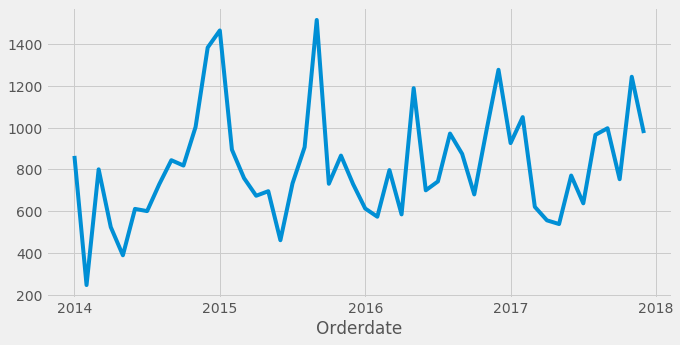

In [30]:
f_mean.plot(figsize=(10, 5))
plt.show()

In [ ]:
# From the above graph it can be seen that there is an upward trend in each beginning year. Now we can visulaize this data by using
#...Time series decomposition that help us to decompose the time series into trend, seasonality and noise..

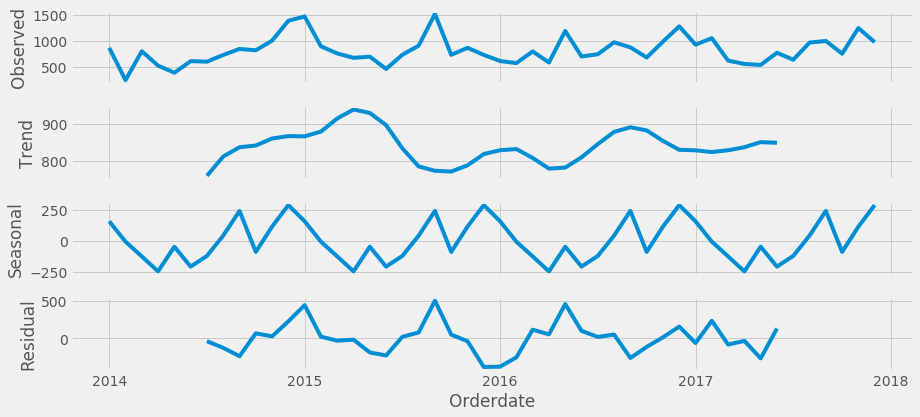

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6

decomposition = sm.tsa.seasonal_decompose(f_mean, model='additive')
fig = decomposition.plot()
plt.show()


In [29]:
# from the above chart it can be clearly seen that the time series of furniture sale is along with its obvious seasonality.

In [30]:
# Now its time for Dickey-Fuller Test, Its help us to identify the time series is stationary.

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #DTo findout the rolling statistics
    rolmean = timeseries.rolling(12).mean() #pd.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()#pd.rolling_std(timeseries, window=12)

    #visualize rolling statistics:
    fig = plt.figure(figsize=(16, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

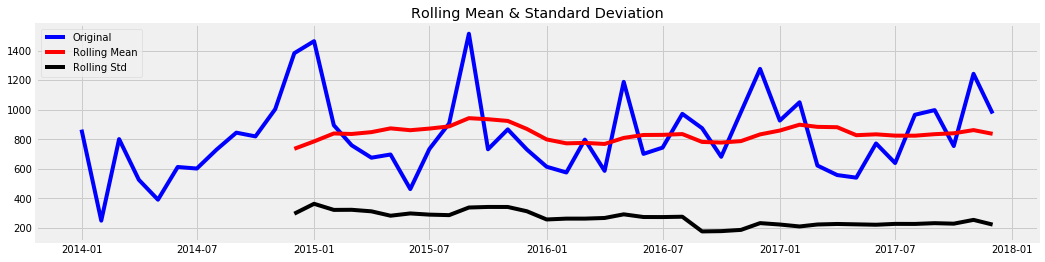

Results of Dickey-Fuller Test:
Test Statistic                 -4.065111
p-value                         0.001105
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [32]:
test_stationarity(f_mean)

In [51]:
# ARIMA MODEL..........The most common Time series forecasting method.

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(f_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:770.4206789110617
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1520.8315233569567
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:511.7627552346454
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:529.4228051599147
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1311.6178989114462
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:334.77746753634335
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:719.2808934694091
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2767.59523433721
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:494.3416759022525
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:526.957599712944
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2694.8299280568117
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:336.6812995586065
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:656.2729114486209
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1220.0862156290655
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:507.5920802122664
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:504.0248882247784
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1192.2083779915288
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:337.5123296425246
ARIMA(

In [ ]:
#The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 312.53. Therefore we should consider this to be optimal option.

In [34]:
mod = sm.tsa.statespace.SARIMAX(f_mean,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0028      0.363      0.008      0.994      -0.709       0.715
ma.L1         -1.0000      0.233     -4.292      0.000      -1.457      -0.543
ar.S.L12      -0.6317      0.136     -4.658      0.000      -0.897      -0.366
sigma2      5.471e+04   4.26e-06   1.28e+10      0.000    5.47e+04    5.47e+04


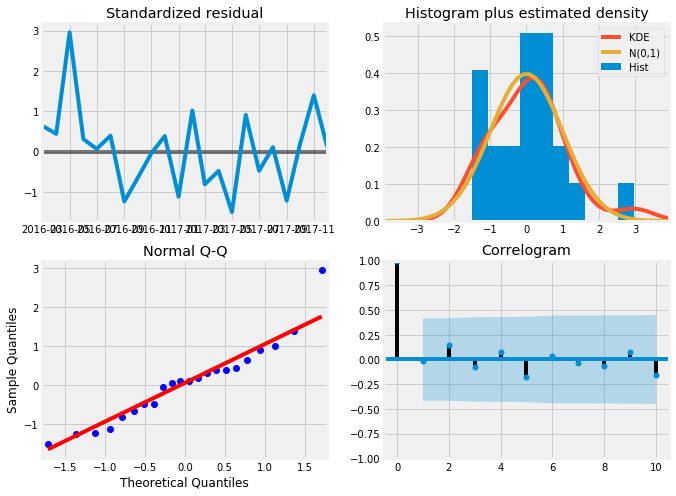

In [35]:
# To run model diagnostics to investigate any unusual behaviour...
results.plot_diagnostics(figsize=(10, 8))
plt.show()

In [59]:
## Validating forecasts

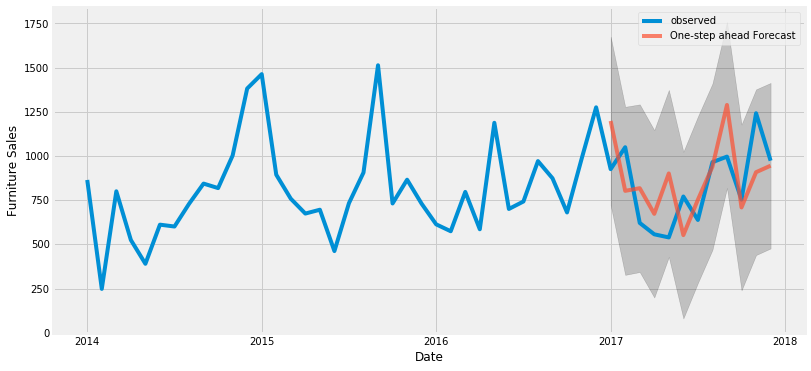

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = f_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(12, 6))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()


In [37]:
y_forecasted = pred.predicted_mean
y_truth = f_mean['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 48289.21


In [38]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 219.75


In [39]:
## Producing and visualizing forecasts

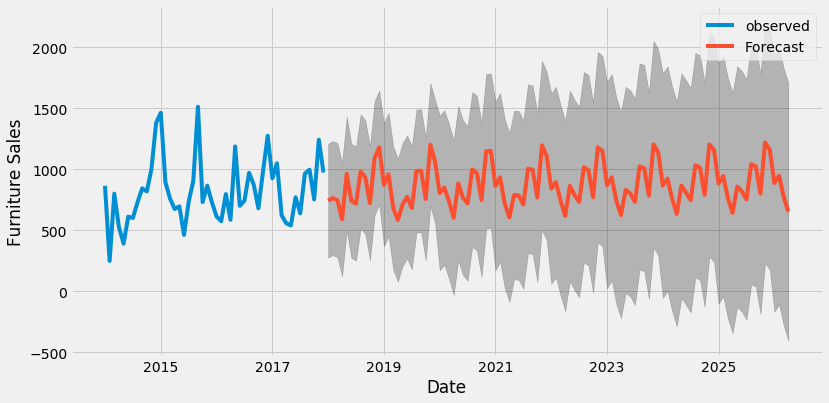

In [68]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = f_mean.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()
